# Least-Squares Regression Project
## Statistics, Fall 2021
### Name: Michael Hlavaty

#### __TO-DO__: Ask Mr. Lisa/Peer Reviewer about...
1. Introduction ✅
2. Questions ✅
3. Calculate stderr ✅
4. Include other vars? ✅
5. Validity of source
6. Term for residual plot patterns ✅
7. Analyze data.describe() stats with a boxplot
8. Analyze sliced graphs ✅
9. Conclusion

## Introduction

There are many factors that go into the valuation of a house. As a teenager with little experience in the process of buying a house, I expect that the larger the property size, the higher the valuation of the house. I wonder, how strong is the relationship between the size of the property and the sale price of the house? Would it be reasonable to use a linear model to relate these two factos?

I will be using a dataset for house prices for houses in Ames, Iowa in 2011, created by a professor in Statistics named Dean De Cock. According to the data science commuity, this is a reputable dataset, and it has been described as a modernized version of the controversial Boston Housing dataset, which I analyzed in my Computer Science 630 class this year. The Ames Housing dataset involves more than 70 explanatory variables, and in this project, I explore the relationship between Lot Area and Sale Price from the dataset for House Prices in Ames, Iowa and attempt to relate the two factors using a least-square regression line (LSRL).

In [34]:
# Importing a number of helpful Python libraries for calculating and interpreting data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import math

In [76]:
# Importing the entire dataset
data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv') 
data.head() # View a sample of the entire dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Okay, this shows us all of the variables included in the dataset. For this project, we are only focusing on the `LotArea` and `Sale Price`

* `LotArea` is the lot area of the house in square feet
* `SalePrice` is the actual sale price of the house in US dollars

I want to find out if a linear model is appropriate for comparing `LotArea` and `SalePrice`. If so, how well does a LSRL fit these data?

To do this, I will first plot the data in a scatterplot and residual plot. If the linear model appears to be appropriate, I will use the `r` and `r^2` values to analyze how well the LSRL fits the dataset.

### `LotArea` and `SalePrice`

In [36]:
# Creating a table containing LotArea and SalePrice
LotArea_x_SalePrice = data[['LotArea', 'SalePrice']]
LotArea_x_SalePrice

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000
...,...,...
1455,7917,175000
1456,13175,210000
1457,9042,266500
1458,9717,142125


In [111]:
# Looking for any missing data
LotArea_x_SalePrice[LotArea_x_SalePrice.isnull().any(axis=1)]

,LotArea,SalePrice


Great! There appears to be no missing data for these two variables. Let's start comparing analyzing these two variables.

#### Analysis of Basic Stats and Box Plots for `LotArea` and `SalePrice`

In [116]:
# Finding some basic statistics
LotArea_x_SalePrice.describe()

,LotArea,SalePrice
count,1460.000000,1460.000000
mean,10516.828082,180921.195890
std,9981.264932,79442.502883
min,1300.000000,34900.000000
25%,7553.500000,129975.000000
50%,9478.500000,163000.000000
75%,11601.500000,214000.000000
max,215245.000000,755000.000000


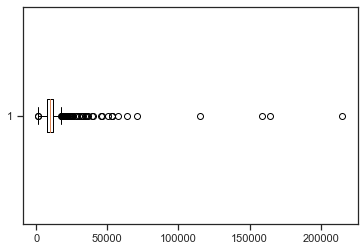

In [126]:
LotAreaBoxPlot = plt.boxplot(LotArea_x_SalePrice['LotArea'], vert=False)

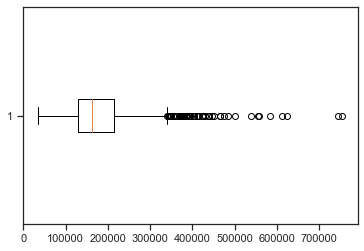

In [127]:
SalePriceBoxPlot = plt.boxplot(data.SalePrice, vert=False)

Above are a table of statistics named `LotArea_x_SalePrice` and boxplots displaying each variable's respective statistics. Both variables have the same count, meaning that each house's total valuation (`SalePrice`) also has a `LotArea` recorded. __Analyze boxplots__

#### Scatterplots for `LotArea` and `SalePrice`

Slope: 2.0999719517076754
Intercept: 158836.15189687657
r value: 0.26384335387140573
r^2: 0.06961331538211182

LSRL: y_hat = 158836.15189687657+2.0999719517076754x



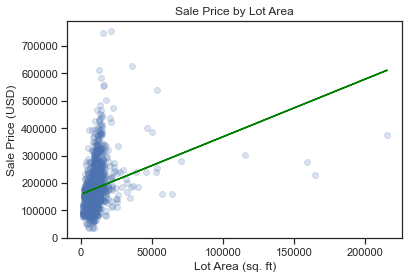

In [112]:
# Creating a scatterplot
lot_areas = np.array([i for i in data.LotArea])
sale_prices = np.array([i for i in data.SalePrice])
plt.scatter(lot_areas, sale_prices, alpha=0.2)
plt.title("Sale Price by Lot Area")
plt.xlabel("Lot Area (sq. ft)")
plt.ylabel("Sale Price (USD)")

(slope, intercept, rvalue) = linregress(lot_areas,sale_prices)[:3]
y_pred = intercept + slope*lot_areas
plt.plot(lot_areas,y_pred, color="green", label="Fitted line")

print("Slope: {}\nIntercept: {}\nr value: {}\nr^2: {}\n".format(slope, intercept, rvalue, rvalue**2))
print("LSRL: y_hat = {}+{}x\n".format(intercept, slope))

plt.show()

#### Analysis of Scatterplot for `SalePrice` by `LotArea`

There appears to be a very weak, positive, linear association between the `LotArea` of a house and its `SalePrice`. In the scatterplot relating `LotArea` and `SalePrice`, there appear to be many outliers in both the x-axis and y-axis. For example, in that scatterplot, there are a lot of observations with `LotArea` > 20,000 sq. ft. that deviate from the large blob of values around 0 < `LotArea` < 20,000 sq. ft. These deviating observations can be considered as influential observations because they appear to bring the slope of the LSRL down from the expected, greater slope for the LSRL that would travel through the blob. As a result of the influential observations, the LSRL appears to not travel through the majority of the points with `LotArea` < 20,000 sq. ft. The alpha-gradient shading demonstrates that the data is highly concentrated around values with `LotArea` < 20,000 sq.ft.

Based off the scatterplot, LSRL, and residual plot relating `LotArea` to `Saleprice`, using a linear model would probably not be appropriate.

### Sliced Data for `LotArea` and `SalePrice`

If I remove the influential observations and zoom in on the blob, the LSRL might be more appropriate, especially from a visual standpoint.

In [106]:
# Removing all data with LotArea < 20,000 sq. ft., as these values appear to be deviating from the blob
sliced_data = data[data.LotArea < 20000]

#### Scatterplot for Sliced Data for `LotArea` and `SalePrice`

Slope: 9.52677794291575
Intercept: 89048.88524500681
r value: 0.41875319304983233
r^2: 0.17535423668943015

LSRL: y_hat = 89048.88524500681+9.52677794291575x



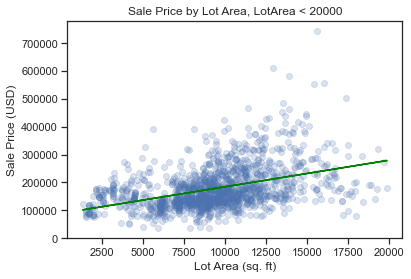

In [114]:
lot_areas = np.array([i for i in sliced_data.LotArea])
sale_prices = np.array([i for i in sliced_data.SalePrice])
plt.scatter(lot_areas, sale_prices, alpha=0.2)
plt.title("Sale Price by Lot Area, LotArea < 20000")
plt.xlabel("Lot Area (sq. ft)")
plt.ylabel("Sale Price (USD)")

(slope, intercept, rvalue) = linregress(lot_areas,sale_prices)[:3]
y_pred = intercept + slope*lot_areas
plt.plot(lot_areas,y_pred, color="green", label="Fitted line")

print("Slope: {}\nIntercept: {}\nr value: {}\nr^2: {}\n".format(slope, intercept, rvalue, rvalue**2))
print("LSRL: y_hat = {}+{}x\n".format(intercept, slope))

plt.show()

#### Residual Plot for Sliced Data for `LotArea` and `SalePrice`

Standard Deviation of Residuals: $68738.58030266473


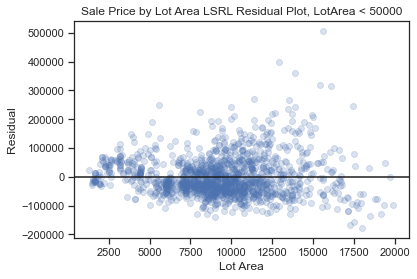

In [115]:
# Creating a residual plot
def get_y_hat(x_set):
    y_hats = []
    for x in x_set:
        y_hat = slope*x + intercept
        y_hats.append(y_hat)
    return y_hats

y_hats = get_y_hat(lot_areas)
residuals = sale_prices - y_hats
# std. dev. of residuals = sqrt(sigma(residuals^2) / n-1)
s = math.sqrt((sum(residuals**2)) / (len(lot_areas)-1))
print("Standard Deviation of Residuals: ${}".format(s))

import seaborn
seaborn.set(style='ticks')
plt.plot(lot_areas, residuals,'o',alpha=0.2)
plt.axhline(y=0, color='k')
plt.ylabel("Residual")
plt.xlabel("Lot Area")
plt.title("Sale Price by Lot Area LSRL Residual Plot, LotArea < 50000")
plt.show()

#### Analysis for Sliced `LotArea` and `SalePrice` Graphs

There appears to be a moderately strong, positive, linear relationship relating `LotArea` and `SalePrice` where the `LotArea` values are all less than 30,000 sq. ft. There are a couple outliers in the scatterplot relating the sliced `LotArea` and `SalePrice` values. For example, there are houses with `LotArea` between 12,500 and 17,500 sq. ft. with a `SalePrice` that is significantly greater than most other houses with a `LotArea` between that range. Conversely, there are also houses with a `LotArea` between 17,500 sq. ft. and 20,000 sq. ft. with a `SalePrice` that is less than most other houses with a `LotArea` between that range. In the residual plot above, there does not appear to be any obvious patterns. Based off the scatterplot and residual plot, a linear model relating the sliced data for `SalePrice` and `LotArea` is reasonable.

From the computer output, the estimated `SalePrice` based on the `LotArea` is modeled with the LSRL of `y_hat` = 89048.88524500681+9.52677794291575x. This means that the `SalePrice` of a house, on estimate, increased approximately 9.53USD for every increase of one sq. ft. of `LotArea`. The LSRL intercept, 89048.88524500681USD, represents the estimated value of a house with no `LotArea`. The `r-value` = 0.41875319304983233, meaning that the data is moderately strongly correlated. The standard deviation of the residuals is `s` = 68738.58030266473USD, meaning that the LSRL's predicted values will typically be off by 68738.58USD when using a linear model to relate `LotArea` and `SalePrice`. Finally, 0.17535423668943015 or around 17.5% of the `SalePrice` variation is accounted by the LSRL relating `LotArea` and `SalePrice`.

Based off the scatterplot, LSRL, and residual plot relating the sliced values of `LotArea` < 30,000 sq. ft. to `Saleprice`, using a linear model is reasonably appropriate, but the predictions may not be very accurate. The LSRL's typical prediction error is around 68738.58USD, and around 82% of the variation in the dataset is unaccounted for by the LSRL.

## Conclusion

In the house pricing dataset for houses in Ames, Iowa, using a linear model to compare each house's `LotArea` to its `SalePrice` does not seem reasonable, but using a linear model to compare each house's `LotArea` to its `SalePrice` where its `LotArea` < 30,000 sq. ft. is more reasonable.